In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import seaborn as sns
import sklearn
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import randint


# Task 2 Ensemble Classifiers - MEAN FOR NaNs

## Reading data

### df1

In [56]:
df1 = pd.read_csv("cancerDat.csv", sep = ";", decimal = ",")

df1 = df1.T # Transpose for n x p (samples x predictor variables)
df1.columns = df1.iloc[0] # Setting the columns the first row
df1 = df1.drop('Unnamed: 0', axis=0) # Dropping the first row
df1

Unnamed: 0,RPAB3_ADQFEYVMYGK,LSM8_AEPLNSVAH,BUD23_AGFSGGMVVDYPNSAK,TLN1_ALEATTEHIR,MOES_ALTSELANAR,DDX1_APDGYIVK,ENAH_ASSTSTPEPTR,NUCKS_ATVTPSPVK,STK4_AVGDEMGTVR,PSMD3_AVQGFFTSNNATR,...,TLN1_VLVQNAAGSQEK,LORF1_VSAMEDEMNEMK,LYAG_VTSEGAGLQLQK,LYAG_WGYSSTAITR,SRSF2_YGGGGYGR,BAG5_YLDLEEEADTTK,CLIC4_YLTNAYSR,NOP16_YMVENHGEDYK,SAHH2_YSFMATVTK,CAH1_YSSLAEAASK
NO.REC_1,21.923472,24.442617,19.050562,18.482667,24.086793,20.32946,19.304363,24.270429,18.878984,18.752264,...,19.439382,16.142102,22.858297,22.262118,18.079186,17.151515,20.912124,17.298159,19.097263,21.21211
NO.REC_2,21.020165,23.649841,18.402413,19.088996,24.710323,21.495392,19.454826,25.807051,19.091796,19.213397,...,20.631064,NaN,22.028998,22.031468,17.101384,18.315637,21.512601,17.100711,18.875548,23.980238
NO.REC_3,19.585788,23.736128,18.191527,16.33124,21.917326,20.284533,16.853825,22.661125,18.215654,20.821777,...,19.123832,16.171227,23.143305,22.334392,17.159968,16.859732,19.076147,15.417028,16.340283,19.810886
NO.REC_4,19.061767,23.374865,17.692775,15.36272,21.484924,18.379603,16.513507,21.401436,18.38696,19.847221,...,17.958307,NaN,19.183961,17.851328,16.564709,15.161135,18.190653,15.269443,15.411408,18.351433
NO.REC_5,18.547029,23.039588,19.066973,15.835721,21.339587,19.550809,16.831653,21.776832,17.85408,20.368534,...,18.212854,NaN,22.228449,21.385404,17.072001,15.071656,18.896095,15.147357,NaN,20.28779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REC_51,16.95971,22.084977,15.468719,NaN,20.465303,18.560795,17.024518,19.902187,36.306672,17.254904,...,15.771337,16.480685,18.80274,18.579435,15.941643,16.176746,18.153191,NaN,16.89869,15.644922
REC_52,20.491818,23.722485,18.685077,NaN,22.461809,18.990078,19.90905,22.973444,17.793059,20.043865,...,19.56898,NaN,20.911123,20.261357,17.523338,17.23828,19.652781,16.627121,NaN,20.600316
REC_53,17.61286,23.882094,17.311329,16.402293,20.451178,17.990707,14.701493,21.157169,17.338684,18.301701,...,16.167853,NaN,20.779238,20.595174,16.686317,17.416759,17.149354,NaN,17.842465,18.067661
REC_54,18.46506,22.328979,18.957264,16.027563,21.679787,18.924127,17.280241,20.58904,19.948565,19.806399,...,18.585722,16.531252,21.205814,20.747455,16.61776,16.980207,18.718031,14.737814,18.155532,18.385178


In [57]:
indices1 = np.array(df1.index).astype(str)
index_array1 = np.zeros(len(indices1))
labels_1 = np.where(np.char.startswith(indices1, 'NO.REC_'), 0, np.where(np.char.startswith(indices1, 'REC_'), 1, index_array1))

### df2

In [58]:
df2 = pd.read_csv("cancerInfo.csv", sep = ";")

df2 = df2.drop(['Unnamed: 0'], axis = 1)
df2 = df2.drop(['Group'], axis = 1)
df2.index = df2.iloc[:,0]
df2 = df2.drop(['sampleNames'], axis = 1)
df2

,sites
sampleNames,
NO.REC_1,A
NO.REC_2,B
NO.REC_3,C
NO.REC_4,C
NO.REC_5,C
...,...
REC_51,C
REC_52,C
REC_53,C


In [59]:
indices2 = np.array(df2.index).astype(str)
index_array2 = np.zeros(len(indices2))
labels_2 = np.where(np.char.startswith(indices2, 'NO.REC_'), 0, np.where(np.char.startswith(indices2, 'REC_'), 1, index_array2))

In [60]:
print("Labels are equal: " + str(np.array_equal(labels_1, labels_2))) # That is we can define a single response variable y for the two files
y = labels_1

Labels are equal: True


## Checking for NaN and empties in the dataframe - substituting them for their column's mean

### df1

In [91]:
print(df1.isnull().values.any()) # True -> There are nulls
print(np.where(df1.applymap(lambda x: x == ''))) # Returns row and column indices of empty values -> None

# There are no NaNs as we have substituted them by their column's mean

False
(array([], dtype=int64), array([], dtype=int64))


In [65]:
df1.fillna(df1.mean(), inplace=True) # substituting them for their column's mean

In [69]:
print(df1.isnull().values.any()) # False -> There are no nulls
# There are no NaNs as we have substituted them by their column's mean

False
(array([], dtype=int64), array([], dtype=int64))


(array([], dtype=int64), array([], dtype=int64))

Visual representation of NaNs in the data -- None

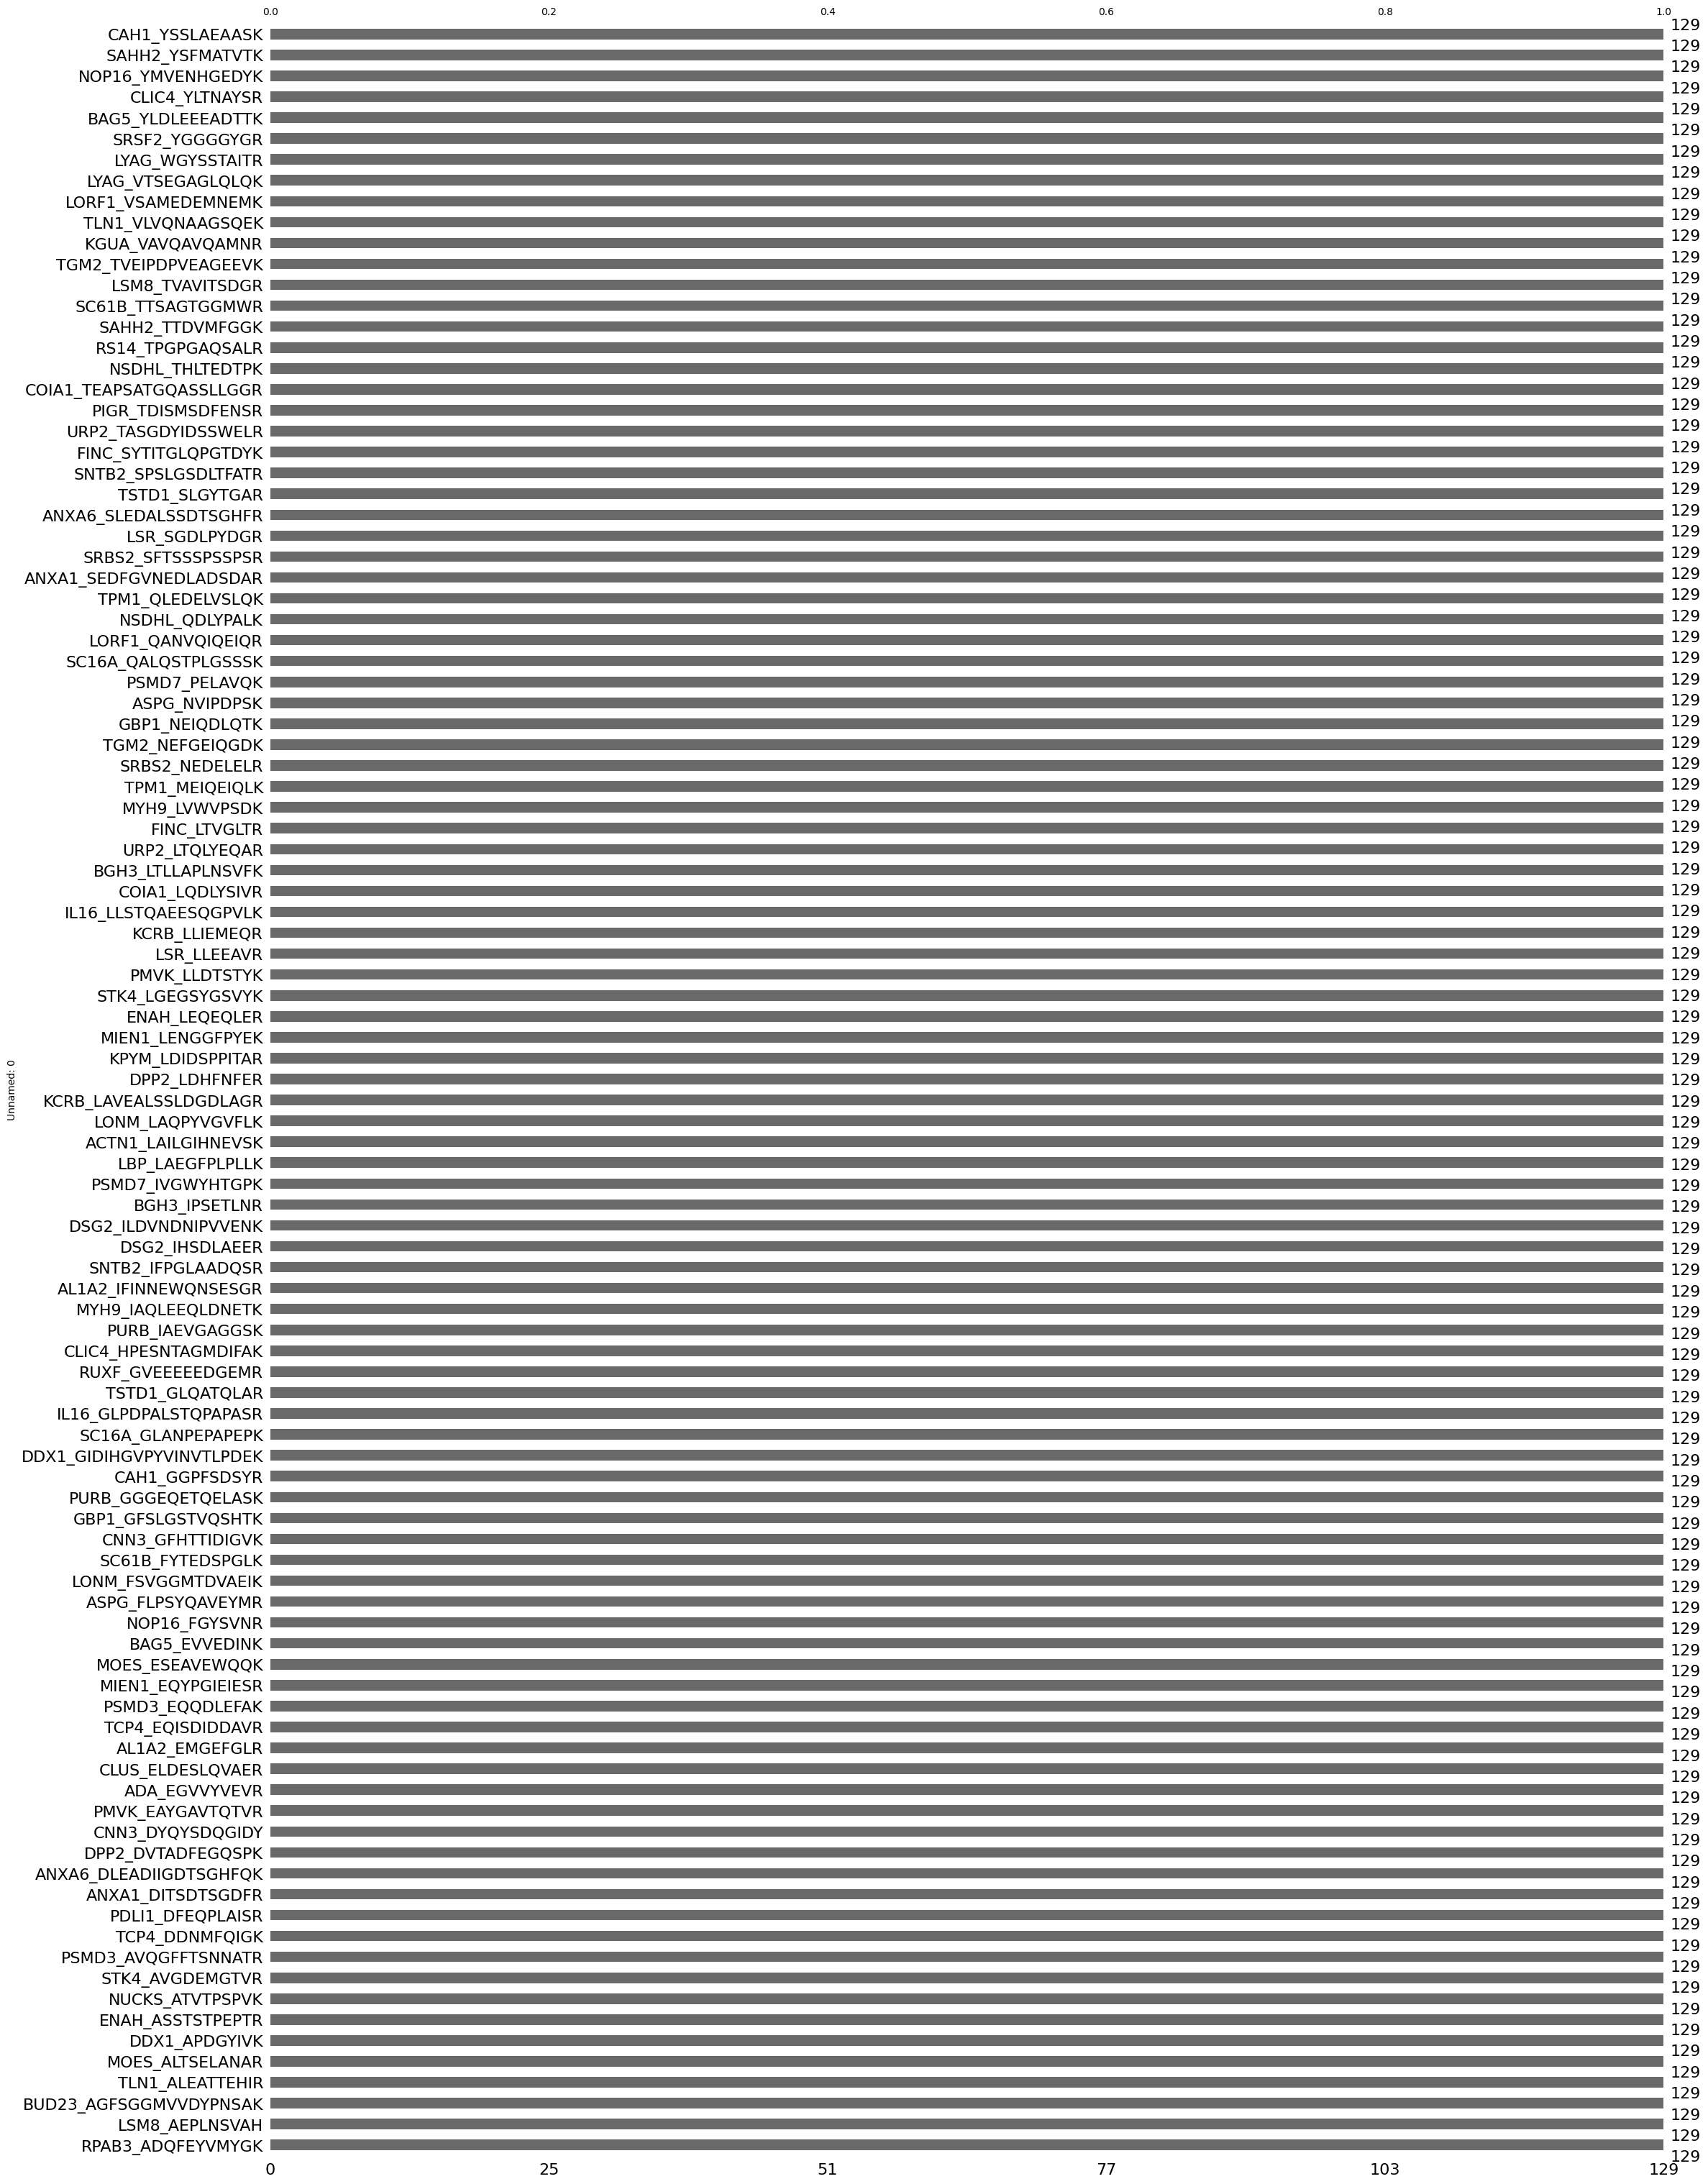

In [70]:
msno.bar(df1)
plt.show()

### df2

In [63]:
print(df2.isnull().values.any()) # False -> No nulls
print(np.where(df2.applymap(lambda x: x == ''))) # Returns row and column indices of empty values - > No empty
print(np.where(pd.isnull(df2))) # Returns row and column indices where the value is NaN -> Void -> No NaNs

False
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


## Train - test split

In [78]:
X1 = pd.DataFrame.to_numpy(df1)
X2 = pd.DataFrame.to_numpy(df2) # Made of strings "A", "B", "C". We need to convert as factor.

In [79]:
print(X2.shape)
X2_original_shape = X2.shape
X2 = np.reshape(X2, [-1]) # "Matrix to vector"
X2.shape

(129, 1)


(129,)

In [80]:
label_encoder = sklearn.preprocessing.LabelEncoder()
X2_factors = label_encoder.fit_transform(X2) 

In [81]:
print(X2_factors.shape)
X2_factors = np.reshape(X2_factors, X2_original_shape)
X2_factors.shape

(129,)


(129, 1)

In [82]:
X = np.concatenate((X1, X2_factors), axis=1) # Concatenate predictor variables

In [84]:
print(X.shape)  # 129 observations and 103 features
print(y.shape)

(129, 103)
(129,)


In [85]:
np.random.seed(1234)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1234)

## Random forest classifier

In [48]:
from sklearn.metrics import accuracy_score

### Grid search 1 - need not run, result is:  0.7441860465116279 [7, 65]

In [49]:
aux = 0

for n_estimators in range(2, 21):
    for max_features in range(2, 104):
                        
                        
                clf = sklearn.ensemble.RandomForestClassifier(n_estimators = n_estimators, 
                                                              max_features = max_features, 
                                                              random_state = 1234)                
                clf = clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred)
                        
                if test_acc > aux:
                    aux = test_acc
                    combination = [n_estimators, max_features]
                    print(aux)
                    print(combination)

0.4418604651162791
[2, 2]
0.627906976744186
[2, 3]
0.6511627906976745
[2, 12]
0.6744186046511628
[3, 63]
0.6976744186046512
[4, 90]
0.7209302325581395
[7, 63]
0.7441860465116279
[7, 65]


### Grid search 2  - need not run, result is:  0.7906976744186046 [8, 63, 5, 0.92]

In [50]:
aux = 0
for n_estimators in [6, 7, 8]:
    for max_features in [63, 64, 65]:
        for max_depth in range(2, 50):
            for max_samples in np.arange(0.01, 1.01, 0.01):
                        
                # print(n_estimators, max_features, max_depth, max_samples)
                        
                        
                clf = sklearn.ensemble.RandomForestClassifier(n_estimators = n_estimators, 
                                                              max_features = max_features, 
                                                              max_depth = max_depth, 
                                                              random_state = 1234, 
                                                              max_samples = max_samples)
                
                clf = clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred)
                        
                if test_acc > aux:
                    aux = test_acc
                    combination = [n_estimators, max_features, max_depth, max_samples]
                    print(aux)
                    print(combination)

0.5581395348837209
[6, 63, 2, 0.01]
0.5813953488372093
[6, 63, 2, 0.03]
0.6046511627906976
[6, 63, 2, 0.08]
0.627906976744186
[6, 63, 2, 0.09]
0.6511627906976745
[6, 63, 2, 0.35000000000000003]
0.6744186046511628
[6, 63, 2, 0.51]
0.6976744186046512
[6, 63, 3, 0.38]
0.7441860465116279
[6, 63, 3, 0.9400000000000001]
0.7674418604651163
[6, 63, 3, 0.9500000000000001]
0.7906976744186046
[8, 63, 5, 0.92]


### Final random forest model

In [92]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators = 8, 
                                              max_features = 63, 
                                              max_depth = 5, 
                                              random_state = 1234, 
                                              max_samples = 0.92)
                
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

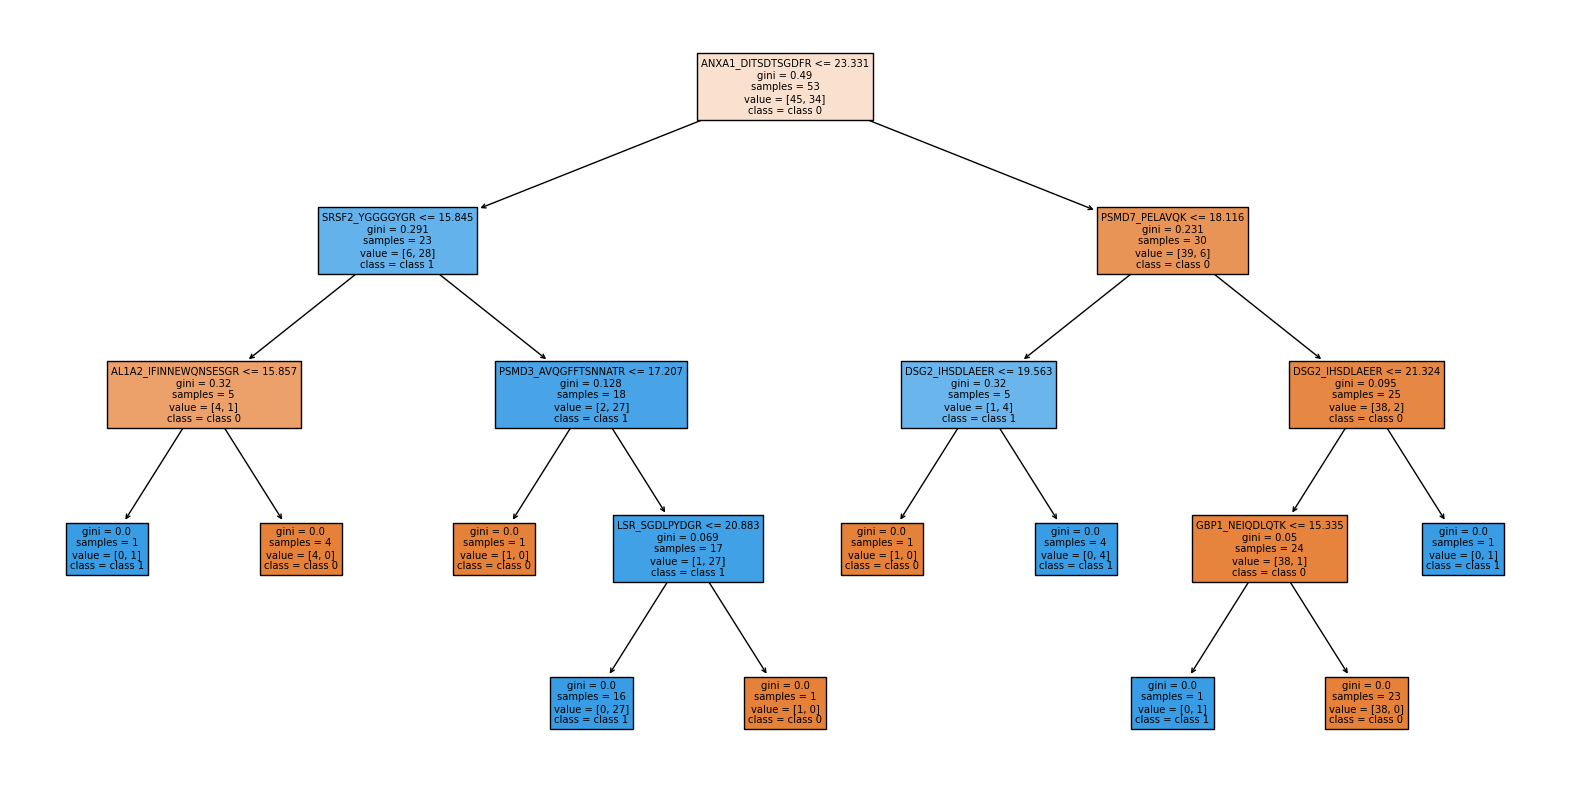

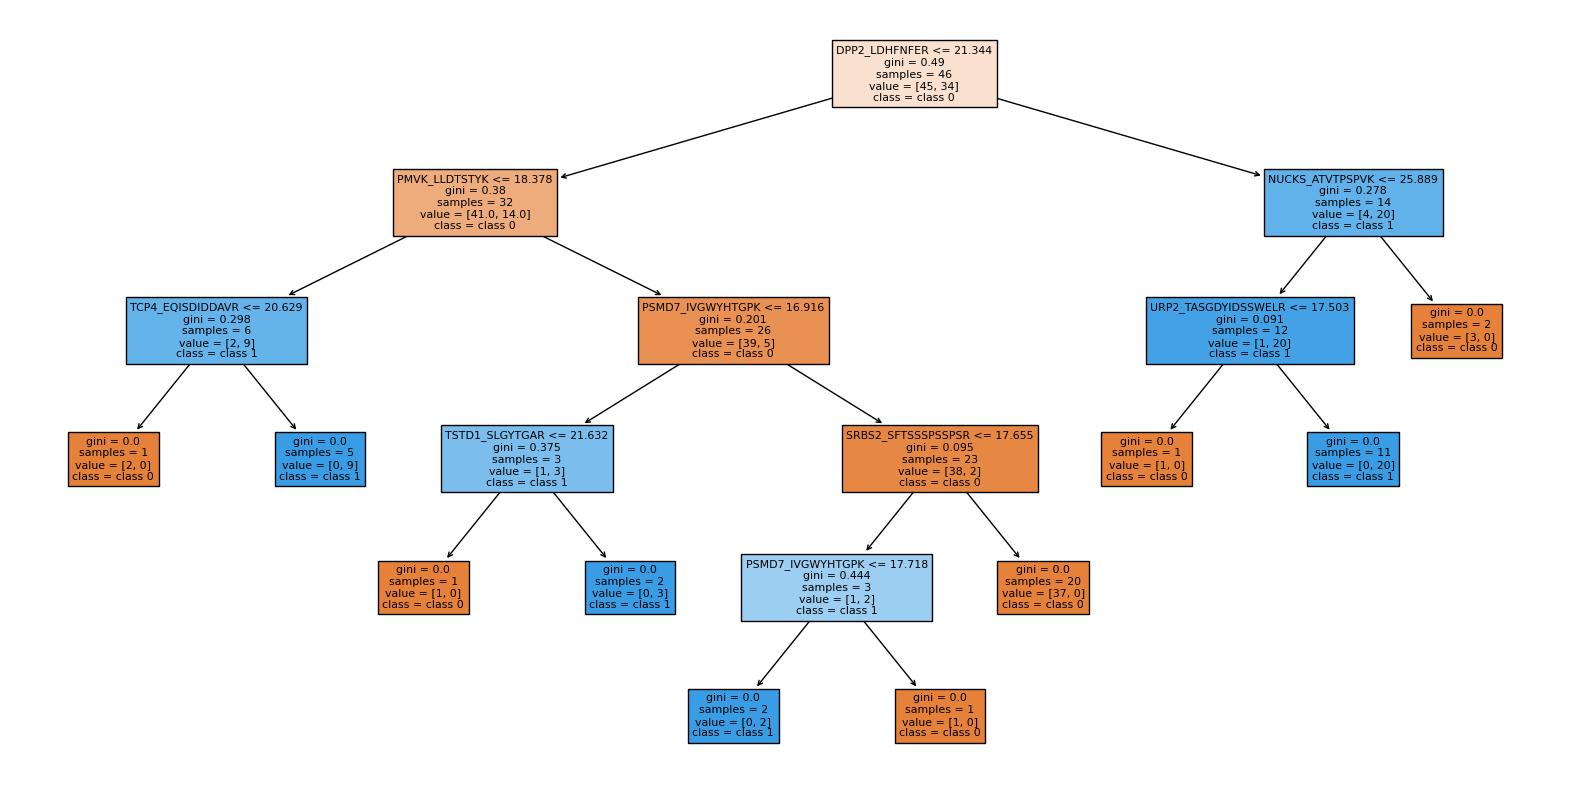

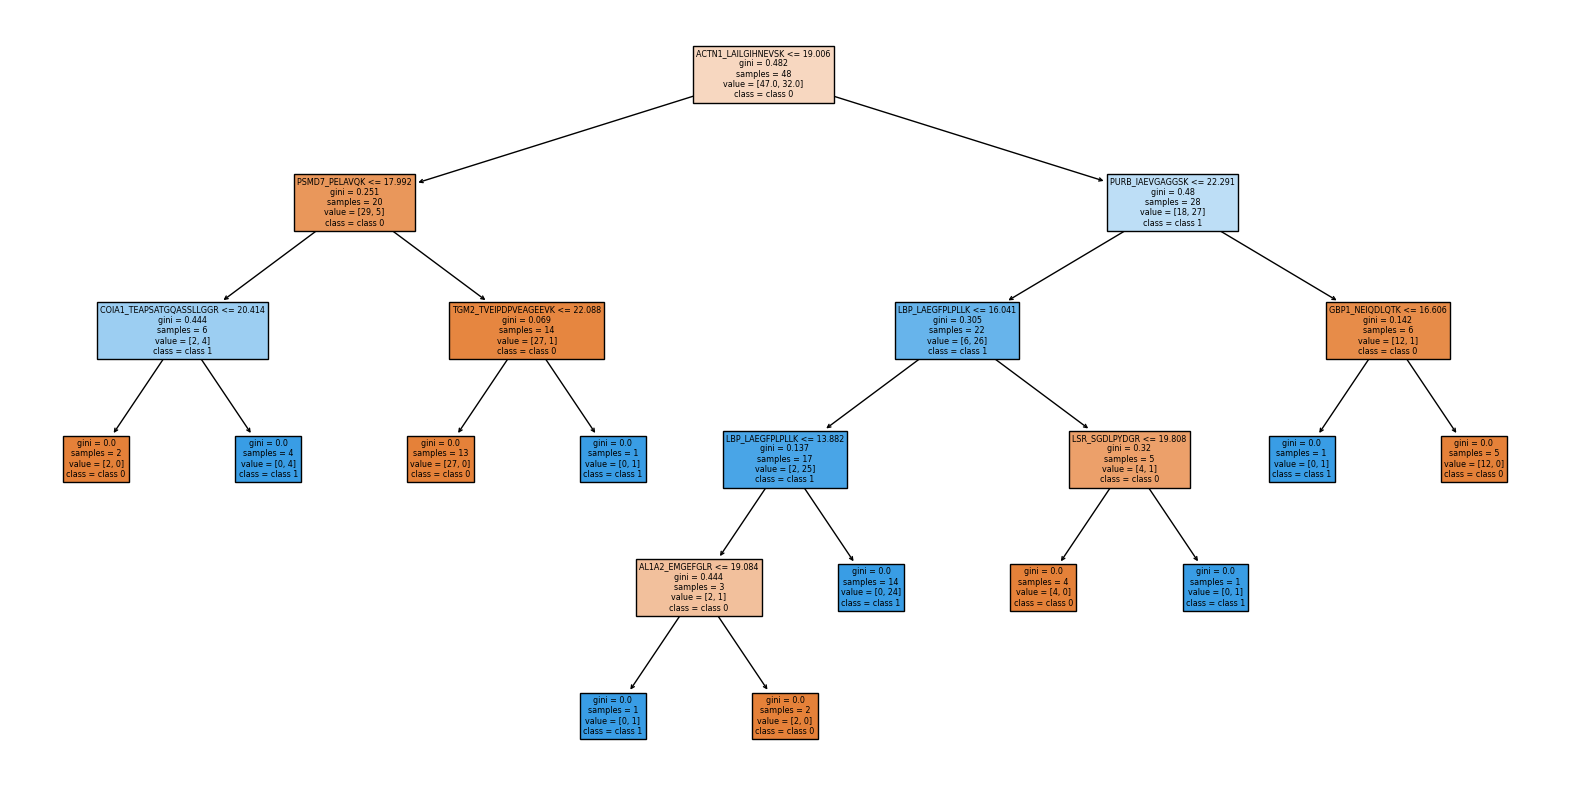

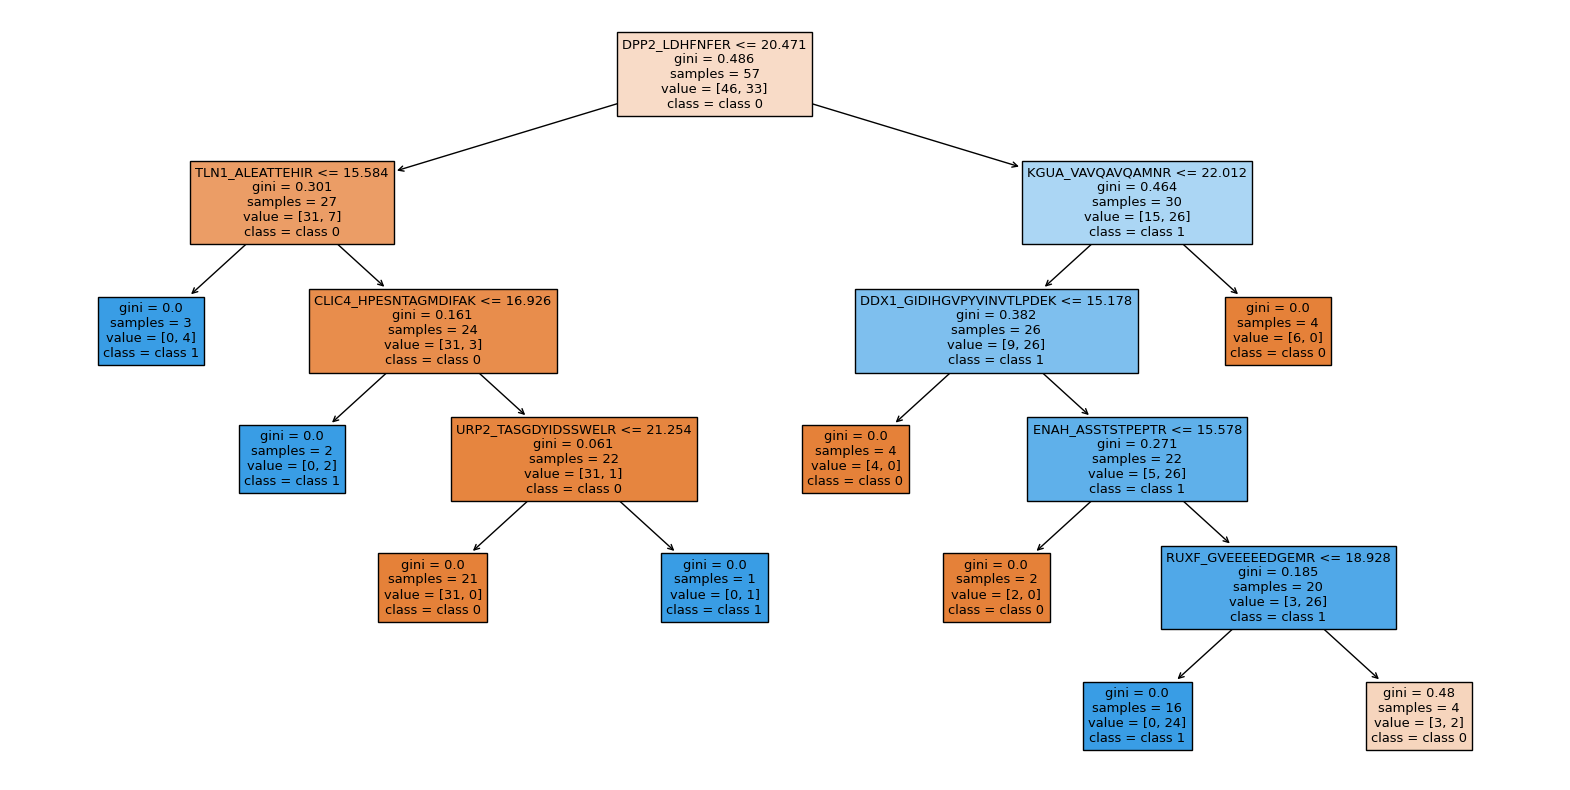

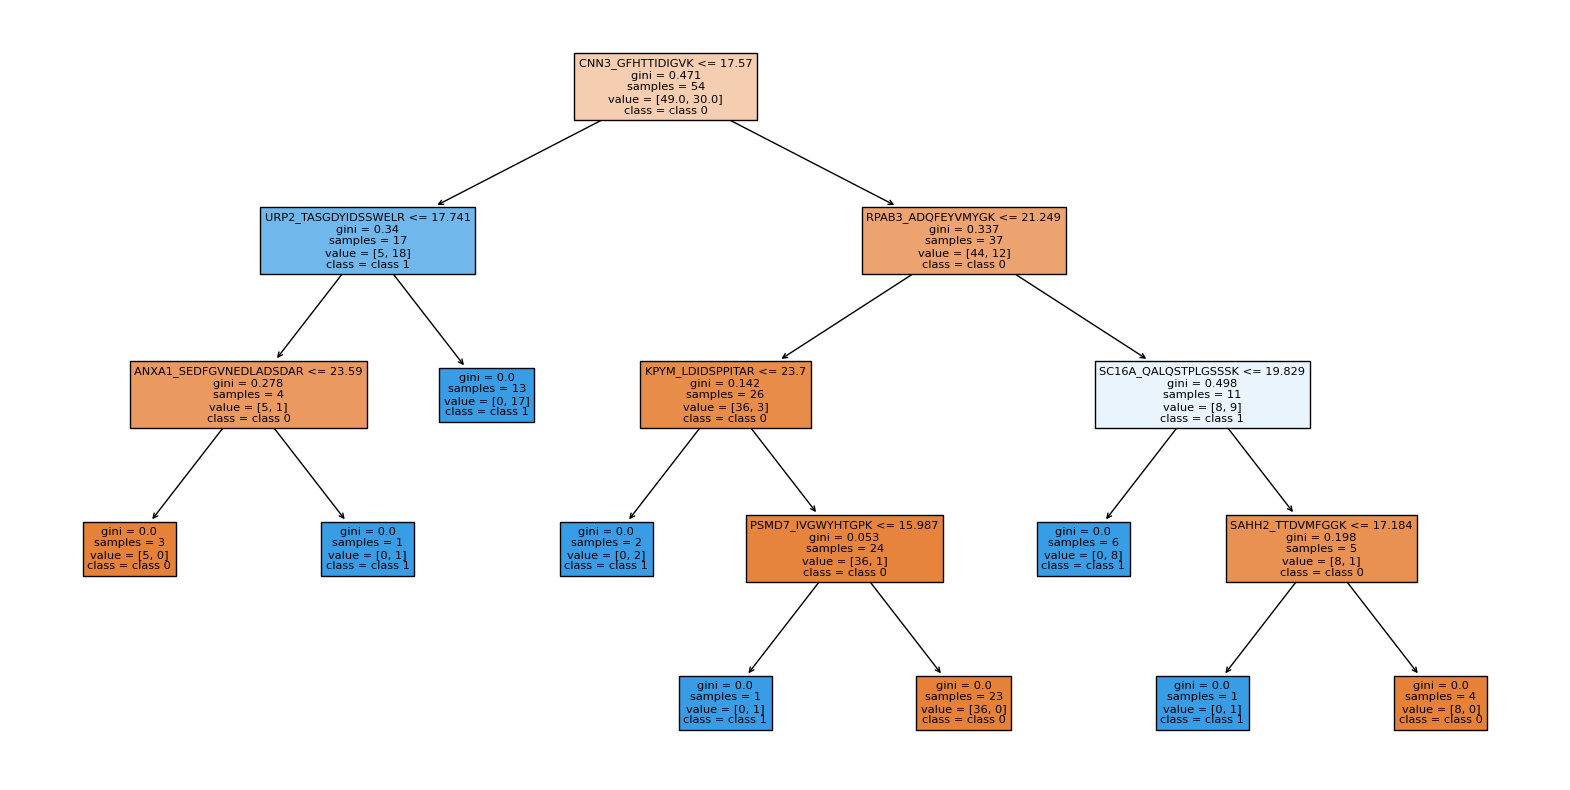

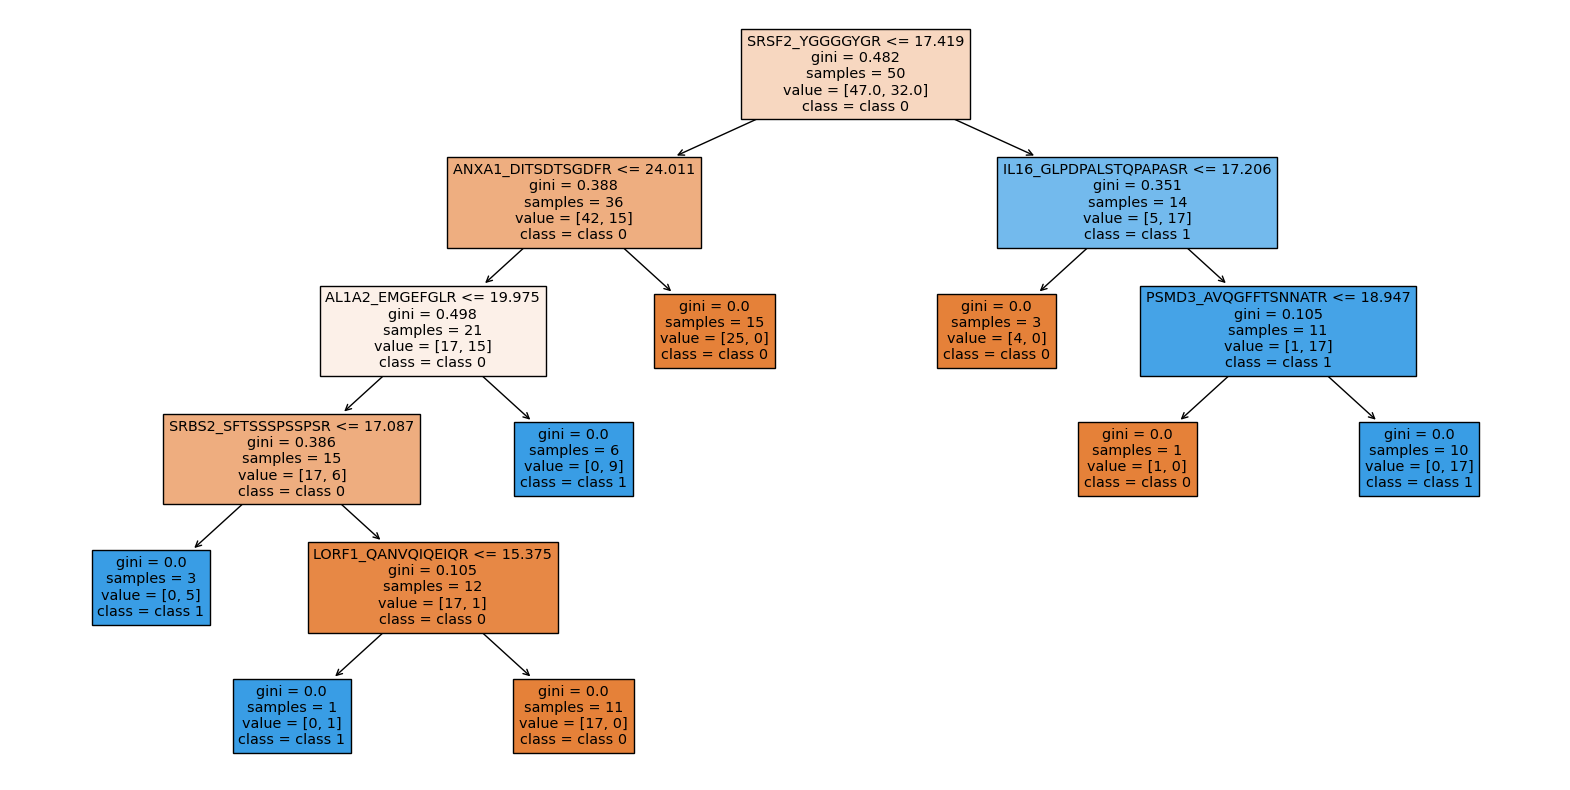

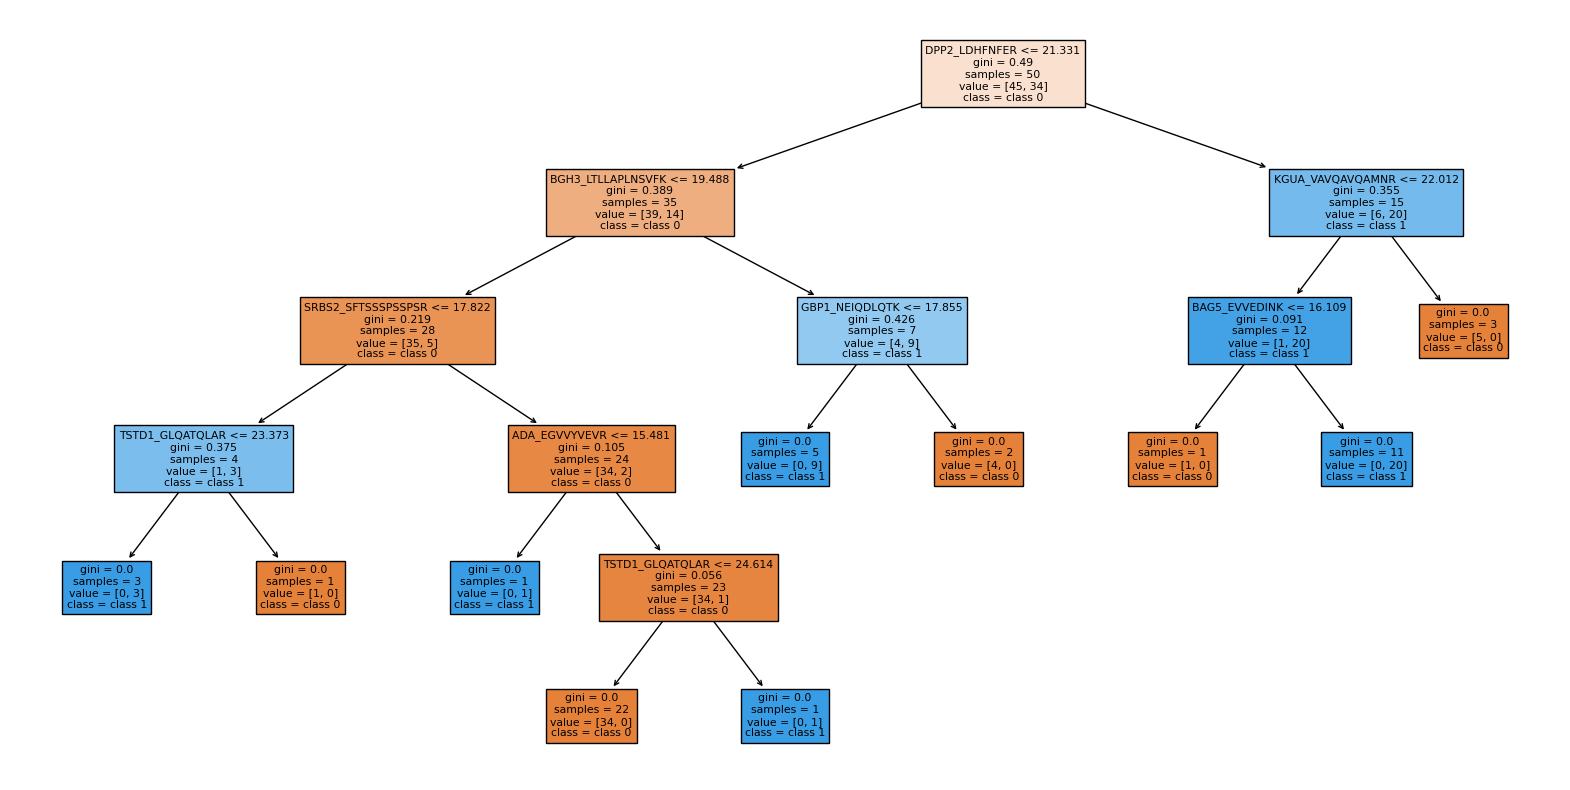

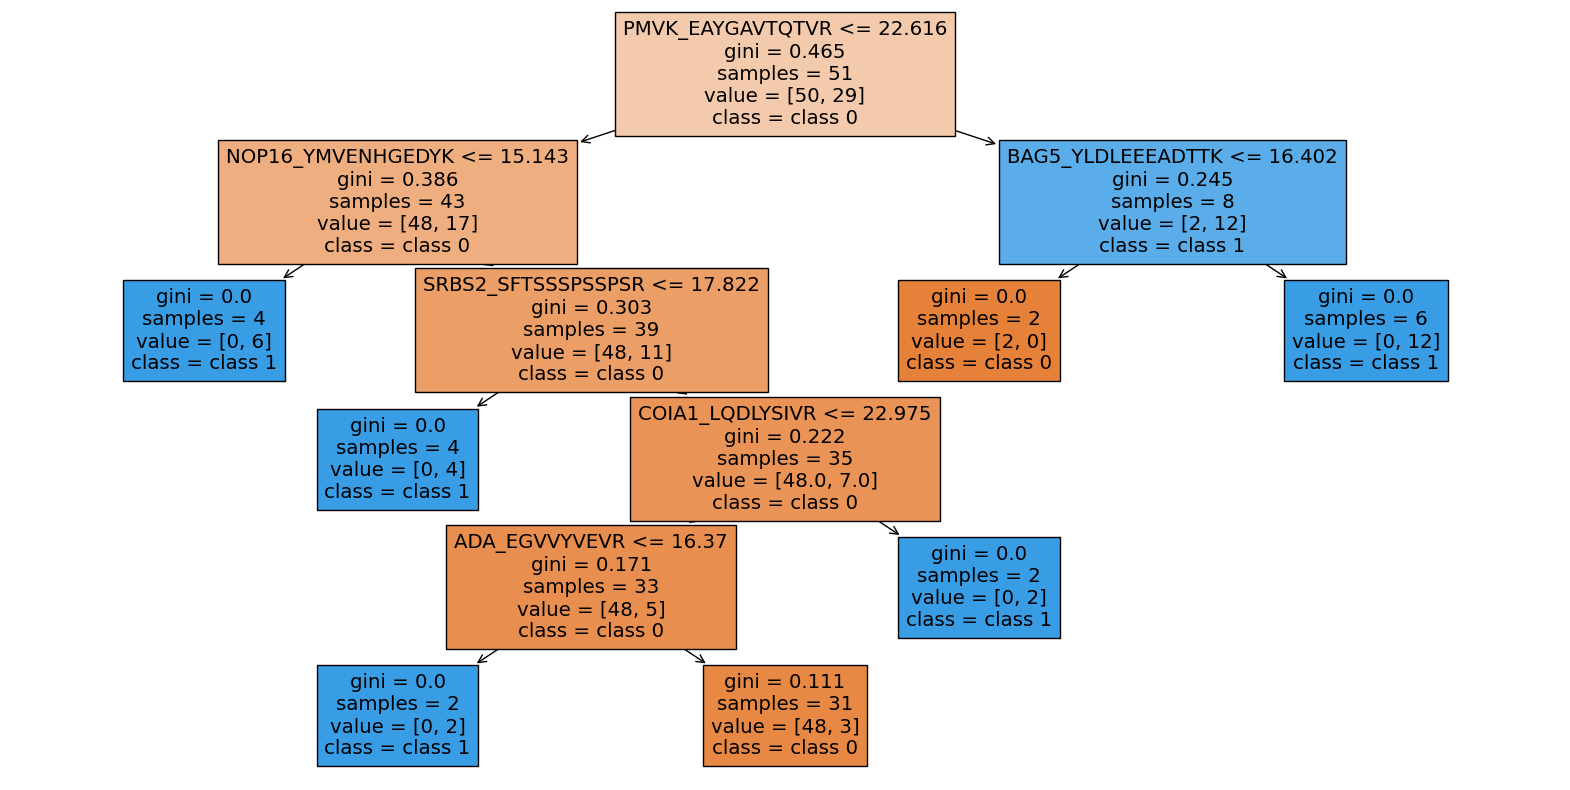

In [93]:
feature_names = list(df1.columns) + list(df2.columns)
class_names = ["class 0", "class 1"]  # Replace with your actual class names
from sklearn import tree


for i in range(0,8):
    estimator = clf.estimators_[i]  # Get the first decision tree from the forest
    
    # Plot the decision tree
    plt.figure(figsize=(20, 10))
    tree.plot_tree(estimator, filled=True, feature_names=feature_names, class_names=class_names)
    plt.show()


## Importance

In [88]:
importances = pd.DataFrame({'Predictor' : feature_names,
              'Importance': clf.feature_importances_})

importances.sort_values('Importance', ascending=False)

,Predictor,Importance
51,DPP2_LDHFNFER,0.092549
12,ANXA1_DITSDTSGDFR,0.079795
76,SRBS2_SFTSSSPSSPSR,0.064941
91,KGUA_VAVQAVQAMNR,0.043254
96,SRSF2_YGGGGYGR,0.041772
...,...,...
54,ENAH_LEQEQLER,0.000000
53,MIEN1_LENGGFPYEK,0.000000
1,LSM8_AEPLNSVAH,0.000000
50,KCRB_LAVEALSSLDGDLAGR,0.000000


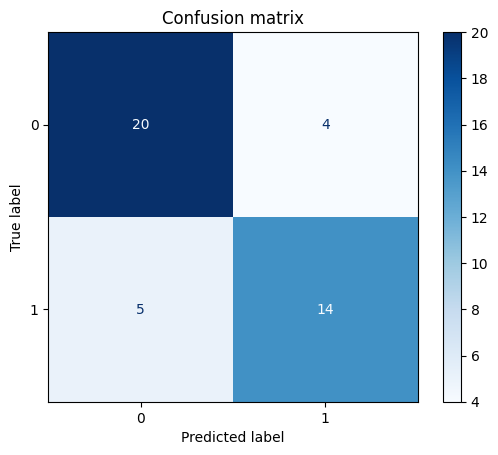


Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.83      0.82        24
         1.0       0.78      0.74      0.76        19

    accuracy                           0.79        43
   macro avg       0.79      0.79      0.79        43
weighted avg       0.79      0.79      0.79        43



In [89]:
confusion_mtx = confusion_matrix(y_test, y_pred) 

disp = ConfusionMatrixDisplay(confusion_matrix= confusion_mtx, display_labels= None)
disp.plot(cmap= plt.cm.Blues)
plt.title("Confusion matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))
